In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Top Indian Places to Visit.csv")
df.head()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [5]:
df.shape

(325, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        325 non-null    int64  
 1   Zone                              325 non-null    object 
 2   State                             325 non-null    object 
 3   City                              325 non-null    object 
 4   Name                              325 non-null    object 
 5   Type                              325 non-null    object 
 6   Establishment Year                325 non-null    object 
 7   time needed to visit in hrs       325 non-null    float64
 8   Google review rating              325 non-null    float64
 9   Entrance Fee in INR               325 non-null    int64  
 10  Airport with 50km Radius          325 non-null    object 
 11  Weekly Off                        32 non-null     object 
 12  Signific

In [8]:
df.drop(columns=["Unnamed: 0"], inplace=True)


In [9]:
df.describe()

,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs
count,325.000000,325.000000,325.000000,325.000000
mean,1.807692,4.486154,115.809231,0.408438
std,0.971398,0.274580,530.859785,0.646668
min,0.500000,1.400000,0.000000,0.010000
25%,1.000000,4.400000,0.000000,0.059000
50%,1.500000,4.500000,0.000000,0.170000
75%,2.000000,4.600000,40.000000,0.500000
max,7.000000,4.900000,7500.000000,7.400000


Distribution Analysis (Univariate Analysis)

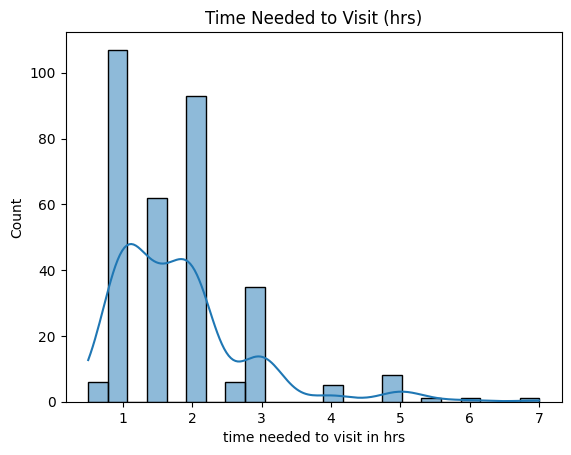

In [12]:
sns.histplot(df["time needed to visit in hrs"], kde=True)
plt.title("Time Needed to Visit (hrs)")
plt.show()


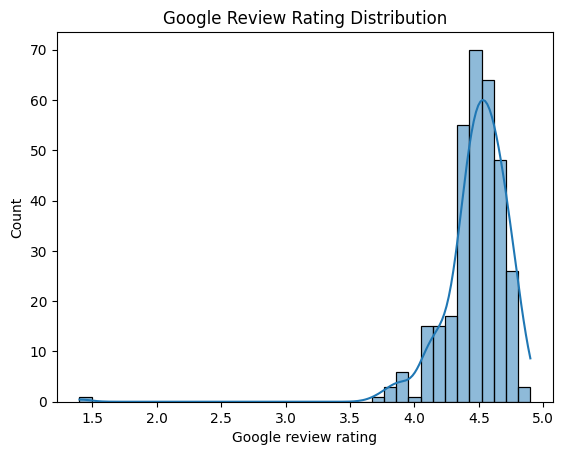

In [13]:
sns.histplot(df["Google review rating"], kde=True)
plt.title("Google Review Rating Distribution")
plt.show()


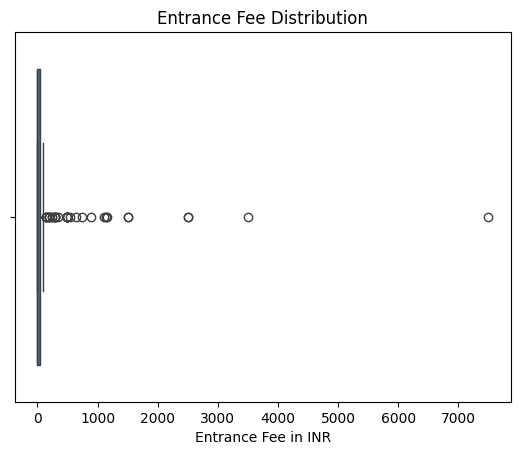

In [14]:
sns.boxplot(x=df["Entrance Fee in INR"])
plt.title("Entrance Fee Distribution")
plt.show()


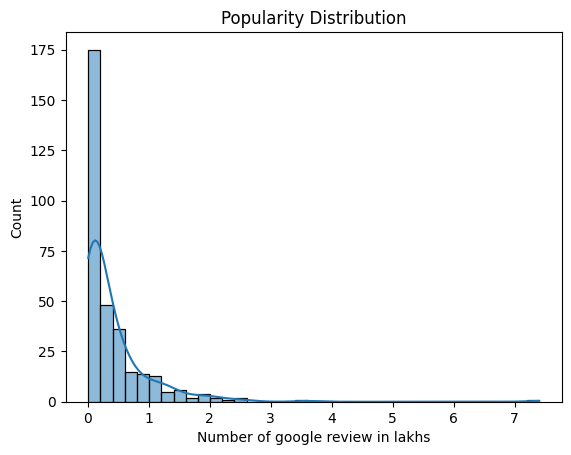

In [15]:
sns.histplot(df["Number of google review in lakhs"], kde=True)
plt.title("Popularity Distribution")
plt.show()


Outlier Analysis

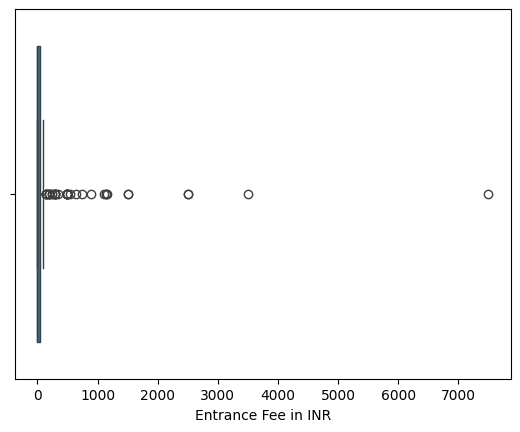

In [16]:
sns.boxplot(x=df["Entrance Fee in INR"])
plt.show()


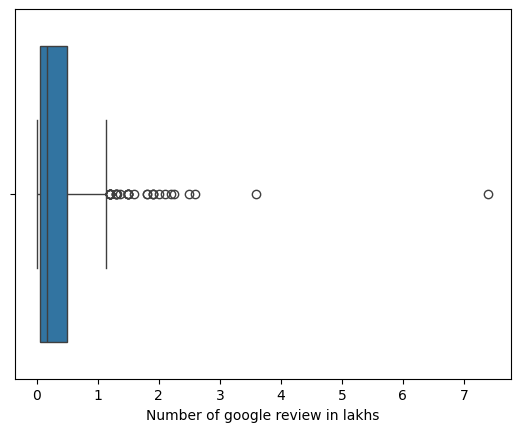

In [17]:
sns.boxplot(x=df["Number of google review in lakhs"])
plt.show()


Relationship Analysis (Bivariate Analysis)

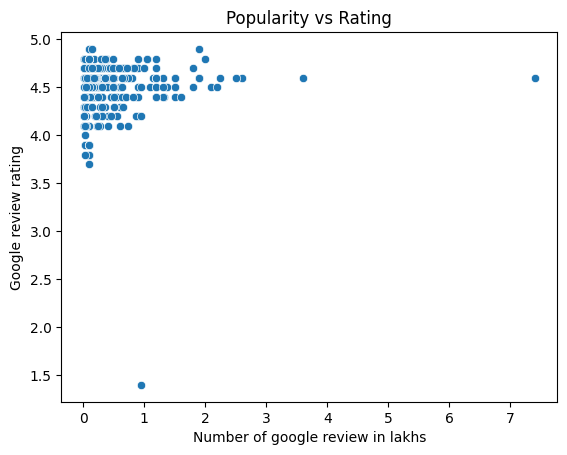

In [18]:
sns.scatterplot(
    x=df["Number of google review in lakhs"],
    y=df["Google review rating"]
)
plt.title("Popularity vs Rating")
plt.show()


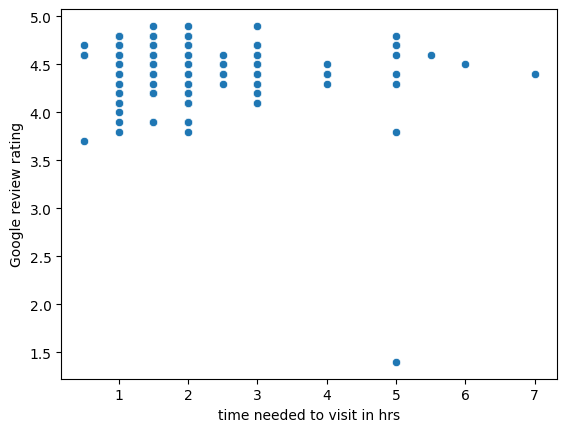

In [19]:
sns.scatterplot(
    x=df["time needed to visit in hrs"],
    y=df["Google review rating"]
)
plt.show()


Categorical Feature Analysis

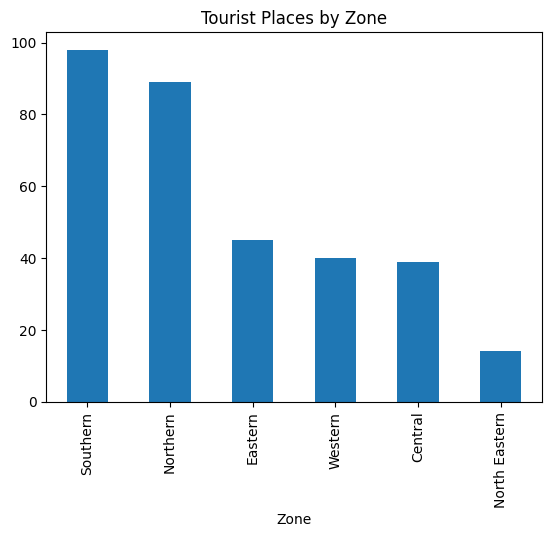

In [20]:
df["Zone"].value_counts().plot(kind="bar")
plt.title("Tourist Places by Zone")
plt.show()


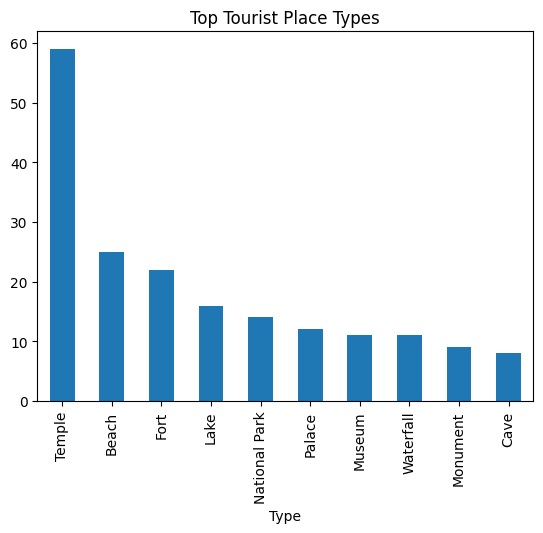

In [21]:
df["Type"].value_counts().head(10).plot(kind="bar")
plt.title("Top Tourist Place Types")
plt.show()


Correlation Analysis

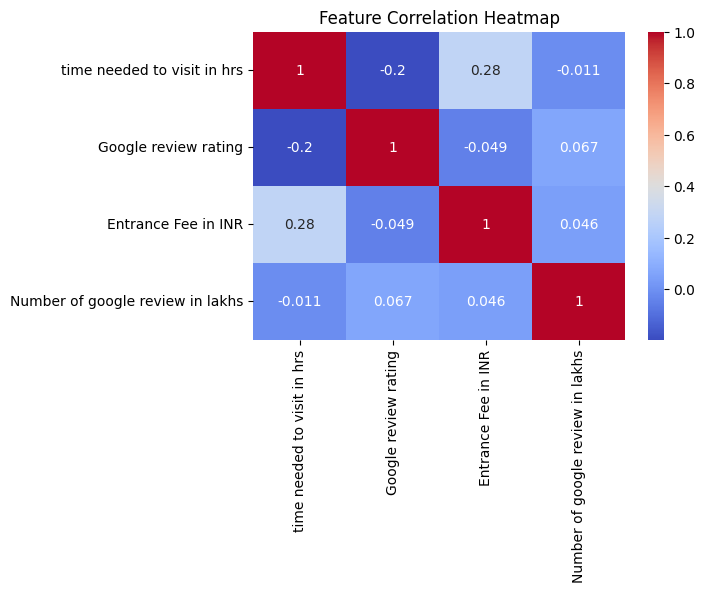

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[[
        "time needed to visit in hrs",
        "Google review rating",
        "Entrance Fee in INR",
        "Number of google review in lakhs"
    ]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation Heatmap")
plt.show()


### EDA Summary:

* Tourist places generally have high ratings, indicating good quality.

* Popularity varies significantly and is an important ranking feature.

* Entrance fee and visit duration show weak correlation with ratings.

* Data normalization is required due to skewness and outliers.

* Distance must be explicitly engineered to support location-based recommendations.

# FEATURE ENGINEERING
(Goal of this step:
Convert raw columns into meaningful numerical features that help the model rank destinations.)

In [30]:
df_fe=df.copy()
df_fe.head()

,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [31]:
df_fe.drop(columns=[
    "Zone",
    "State",
    "Type",
    "Establishment Year",
    "Airport with 50km Radius",
    "Weekly Off",
    "Significance",
    "DSLR Allowed",
    "Best Time to visit"
], inplace=True)


In [32]:
df_fe.head()

,City,Name,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs
0,Delhi,India Gate,0.5,4.6,0,2.60
1,Delhi,Humayun's Tomb,2.0,4.5,30,0.40
2,Delhi,Akshardham Temple,5.0,4.6,60,0.40
3,Delhi,Waste to Wonder Park,2.0,4.1,50,0.27
4,Delhi,Jantar Mantar,2.0,4.2,15,0.31


In [ ]:
df_fe["City"].unique()


In [ ]:
cities = df_fe["City"].unique()
len(cities)   # 214

214

In [43]:
from geopy.geocoders import Nominatim
from time import sleep

geolocator= Nominatim(user_agent="weekend_getaway_ranker")

city_coordinate_map={}

for city in cities:
    try:
        location= geolocator.geocode(f"{city},India")
        if location:
            city_coordinate_map[city]=(location.latitude, location.longitude)
        else:
            city_coordinate_map[city]=(None,None)
        sleep(1)
    except:
        city_coordinate_map[city]=(None,None)

In [44]:
city_coords_df = pd.DataFrame.from_dict(
    city_coordinate_map,
    orient="index",
    columns=["latitude", "longitude"]
)

city_coords_df.reset_index(inplace=True)
city_coords_df.rename(columns={"index": "City"}, inplace=True)

city_coords_df.to_csv("city_coordinates.csv", index=False)


In [45]:
coords= pd.read_csv("city_coordinates.csv")

df_fe = df_fe.merge(coords, on="City", how="left")


In [49]:
df_fe[["City", "latitude", "longitude"]].head()


,City,latitude,longitude
0,Delhi,28.613895,77.209006
1,Delhi,28.613895,77.209006
2,Delhi,28.613895,77.209006
3,Delhi,28.613895,77.209006
4,Delhi,28.613895,77.209006


In [50]:
df_fe.isna().sum()[["latitude", "longitude"]]


latitude     18
longitude    18
dtype: int64

In [51]:
df_fe.dropna(subset=["latitude", "longitude"], inplace=True)

In [52]:
df_fe.isna().sum()[["latitude", "longitude"]]


latitude     0
longitude    0
dtype: int64

### Distance Feature

In [53]:
def haversine(lat1, lon1, lat2, lon2):
    import math
    R = 6371

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)

    a = math.sin(dlat/2)**2 + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2)**2

    return 2 * R * math.atan2(math.sqrt(a), math.sqrt(1-a))


In [60]:
source_city = "Mumbai"

src_lat, src_lon = coords[coords["City"] == source_city][
    ["latitude", "longitude"]
].values[0]

df_fe["distance_km"] = df_fe.apply(
    lambda row: haversine(
        src_lat, src_lon,
        row["latitude"], row["longitude"]
    ),
    axis=1
)

In [61]:
df_fe[['City','Name','distance_km']].head(10)

,City,Name,distance_km
0,Delhi,India Gate,1150.594498
1,Delhi,Humayun's Tomb,1150.594498
2,Delhi,Akshardham Temple,1150.594498
3,Delhi,Waste to Wonder Park,1150.594498
4,Delhi,Jantar Mantar,1150.594498
5,Delhi,Chandni Chowk,1150.594498
6,Delhi,Lotus Temple,1150.594498
7,Delhi,Red Fort,1150.594498
8,Delhi,Agrasen ki Baoli,1150.594498
9,Delhi,Sunder Nursery,1150.594498


In [62]:
df_fe.sort_values('distance_km').tail(10)
# [['City','Name','distance_km']]

,City,Name,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs,latitude,longitude,distance_km
280,Guwahati,Pobitora Wildlife Sanctuary,2.0,4.4,500,0.037,26.180598,91.753943,2091.092676
281,Tawang,Tawang Monastery,2.0,4.7,0,0.032,27.587919,91.863733,2155.396055
274,Kaziranga,Kaziranga National Park,3.0,4.5,650,0.068,26.589253,93.408474,2261.889103
293,Baratang Island,Limestone Caves,1.5,4.4,250,0.015,12.188318,92.811035,2265.680232
290,Port Blair,Cellular Jail,1.5,4.7,30,0.120,11.664535,92.739045,2281.101498
291,Havelock Island,Radhanagar Beach,1.0,4.8,0,0.090,11.965195,92.995621,2293.690586
286,Dzükou Valley,Dzükou Valley,3.0,4.7,0,0.010,25.551675,94.121679,2299.210708
292,Neil Island,Bharatpur Beach,1.0,4.5,0,0.040,11.831374,93.041930,2304.090892
277,Majuli,Majuli Island,2.0,4.7,0,0.010,27.021953,94.327423,2363.325661
276,Sivasagar,Sivasagar Sivadol,1.0,4.7,0,0.065,26.983494,94.639423,2391.578295


#### Distance Feature Validation
* The distance feature was validated by verifying zero distance for places within the source city and realistic large distances for geographically distant destinations. This confirms the correctness of coordinate mapping and Haversine distance computation.

## Data Preprocessing & Scaling

In [63]:
#Filter Source City
source_city = "Mumbai"

df_model = df_fe[df_fe["City"] != source_city].copy()

A weekend getaway usually implies traveling outside one’s own city.

In [64]:
features = [
    "Google review rating",
    "Number of google review in lakhs",
    "distance_km"
]

X = df_model[features]
X.head()

,Google review rating,Number of google review in lakhs,distance_km
0,4.6,2.60,1150.594498
1,4.5,0.40,1150.594498
2,4.6,0.40,1150.594498
3,4.1,0.27,1150.594498
4,4.2,0.31,1150.594498


In [65]:
X.describe()

,Google review rating,Number of google review in lakhs,distance_km
count,297.000000,297.000000,297.000000
mean,4.487879,0.380109,1146.264679
std,0.281984,0.629204,490.702174
min,1.400000,0.010000,42.747258
25%,4.400000,0.055000,843.248848
50%,4.500000,0.150000,1150.594498
75%,4.600000,0.490000,1460.333232
max,4.900000,7.400000,2391.578295


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

x_scaled=scaler.fit_transform(X)

In [67]:
X_scaled_df = pd.DataFrame(
    x_scaled,
    columns=features,
    index=df_model.index
)

X_scaled_df.head()


,Google review rating,Number of google review in lakhs,distance_km
0,0.914286,0.350474,0.471659
1,0.885714,0.052774,0.471659
2,0.914286,0.052774,0.471659
3,0.771429,0.035183,0.471659
4,0.800000,0.040595,0.471659


In [68]:
X_scaled_df.describe()

,Google review rating,Number of google review in lakhs,distance_km
count,297.000000,297.000000,297.000000
mean,0.882251,0.050082,0.469816
std,0.080567,0.085143,0.208913
min,0.000000,0.000000,0.000000
25%,0.857143,0.006089,0.340809
50%,0.885714,0.018945,0.471659
75%,0.914286,0.064953,0.603528
max,1.000000,1.000000,1.000000


In [69]:
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Preprocessing Validation
* After normalization using MinMaxScaler, all features were successfully scaled to a uniform range [0, 1]. This ensures fair contribution of rating, popularity, and distance during ranking and prevents dominance of any single feature due to scale differences.

## MODEL TRAINING – RANKING LOGIC

In [ ]:
#Define Weights

weights = np.array([0.4, 0.3, -0.3])
features = [
    "Google review rating",
    "Number of google review in lakhs",
    "distance_km"
]

In [71]:
#Using matrix multiplication
df_model["final_score"] = X_scaled_df.values @ weights

Each row now has one ranking score

In [72]:
ranked_df = df_model.sort_values(
    by="final_score",
    ascending=False
)

In [73]:
ranked_df[[
    "City",
    "Name",
    "final_score"
]].head(10)


,City,Name,final_score
315,Greater Noida,Buddh International Circuit,0.524547
130,Kolhapur,Mahalakshmi Temple,0.391959
126,Shirdi,Sai Baba Temple,0.386436
123,Pune,Shaniwar Wada,0.381363
140,Ujjain,Mahakaleshwar Jyotirlinga,0.372170
71,Somnath,Somnath Temple,0.367476
73,Kevadia,Statue of Unity,0.365942
86,Chittorgarh,Chittorgarh Fort,0.364761
111,Mysore,Mysore Palace,0.363326
128,Ratnagiri,Ganapatipule Temple,0.359865


In [74]:
ranked_df["final_score"].describe()

count    297.000000
mean       0.226980
std        0.074669
min        0.035198
25%        0.175980
50%        0.220607
75%        0.284725
max        0.524547
Name: final_score, dtype: float64

What this tells us

No missing scores → model ran on all destinations

Scores are well spread (0.03 → 0.52)

No extreme explosions → weights + scaling are stable

Good separation between low, medium, and high-ranked places

In [75]:
ranked_df.sort_values("distance_km")[[
    "City", "Name", "distance_km", "final_score"
]].head()

,City,Name,distance_km,final_score
134,Matheran,Echo Point,42.747258,0.343263
127,Alibaug,Alibaug Beach,45.057952,0.321329
131,Lonavala,Karla Caves,65.935350,0.350450
26,Lonavala,Imagicaa,65.935350,0.035198
123,Pune,Shaniwar Wada,119.495256,0.381363


## PREDICTION / RECOMMENDATION FUNCTION

In [80]:
def recommend_places(source_city,top_n=10):
    'Reccomend top weekend getway places from a given source city'
    
    # Get source city coordinates
    src_lat,src_lon=coords[coords['City']==source_city][
        ["latitude",'longitude']
    ].values[0]
    
    #copy dataset and exclude source city
    df_pred=df_fe[df_fe["City"] != source_city].copy()
    
    # calculate distance
    df_pred['distance_km']=df_pred.apply(lambda row: haversine(src_lat,src_lon,row['latitude'],row['longitude']),axis=1)
    
    # select features
    X_pred= df_pred[[
        "Google review rating",
        "Number of google review in lakhs",
        "distance_km"
    ]]
    
    # scaling
    X_pred_scaled = scaler.transform(X_pred)

    # calculating final score
    df_pred["final_score"] = X_pred_scaled @ weights

    # sort and return 
    return df_pred.sort_values(
        by="final_score",
        ascending=False
    )[[
        "City",
        "Name",
        "distance_km",
        "final_score"
    ]].head(top_n)
    

In [81]:
recommend_places("Mumbai", top_n=10)

,City,Name,distance_km,final_score
315,Greater Noida,Buddh International Circuit,1148.008896,0.524547
130,Kolhapur,Mahalakshmi Temple,299.104476,0.391959
126,Shirdi,Sai Baba Temple,186.119553,0.386436
123,Pune,Shaniwar Wada,119.495256,0.381363
140,Ujjain,Mahakaleshwar Jyotirlinga,549.391306,0.372170
71,Somnath,Somnath Temple,328.691590,0.367476
73,Kevadia,Statue of Unity,250.736132,0.365942
86,Chittorgarh,Chittorgarh Fort,650.930478,0.364761
111,Mysore,Mysore Palace,852.862644,0.363326
128,Ratnagiri,Ganapatipule Temple,206.631939,0.359865


In [84]:
recommend_places("Delhi", top_n=3)

,City,Name,distance_km,final_score
315,Greater Noida,Buddh International Circuit,33.952374,0.666838
181,Agra,Taj Mahal,178.278620,0.439337
306,Kedarnath,Kedarnath,296.278279,0.436975


## Model Artifact

In [85]:
model_artifact = {
    "scaler": scaler,
    "weights": weights,
    "features": [
        "Google review rating",
        "Number of google review in lakhs",
        "distance_km"
    ]
}

In [86]:
import joblib

joblib.dump(model_artifact, "weekend_getaway_ranker_model.pkl")


['weekend_getaway_ranker_model.pkl']

In [87]:
loaded_model = joblib.load("weekend_getaway_ranker_model.pkl")

loaded_model.keys()

dict_keys(['scaler', 'weights', 'features'])

In [88]:
test_scaler = loaded_model["scaler"]
test_weights = loaded_model["weights"]

X_test_scaled = test_scaler.transform(X)
test_scores = X_test_scaled @ test_weights

test_scores[:5]


array([0.32935868, 0.22862023, 0.2400488 , 0.17762854, 0.19068093])